# Explore here

In [34]:
# Your code here

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# modelado
from sklearn.model_selection import train_test_split

# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# selecicon
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.exceptions import NotFittedError


# modelado
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv', sep=",")
df.head()





,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [37]:
duplicados = df.duplicated()
numeros_duplicados = duplicados.sum()
print(f"LOS NUMEROS DUPLICADOS EN EL DATASET SON {numeros_duplicados}")

LOS NUMEROS DUPLICADOS EN EL DATASET SON 1


In [38]:
# ELIMINAMOS LO NUMEROS DUPLICADOS
df = df.drop_duplicates()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [40]:
# CONTAMOS CUANTOS NaN EXISTEN POR COLUMNAS PARA SABER DONDE DEBEMOS REEMPLAZARLAS
nan_counts = df.isnull().sum() 
print("CONTEO DE LOS 'NaN' POR COLUMNAS:") 
nan_counts

CONTEO DE LOS 'NaN' POR COLUMNAS:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

---------------ANALISIS UNIVARIANTE------------------
ANALISIS UNIVARIANTE CATEGORICAS


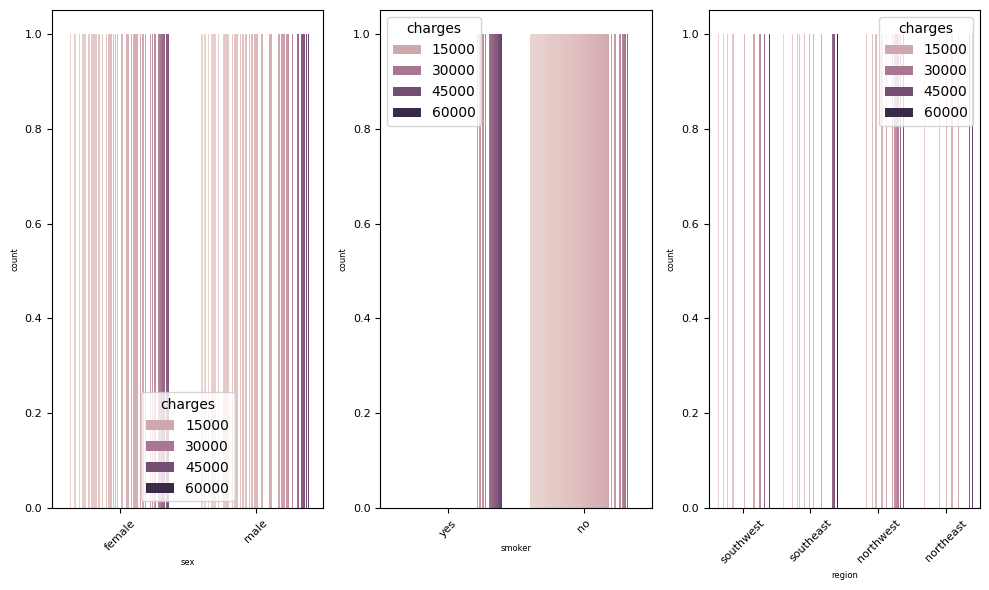

In [41]:
print("---------------ANALISIS UNIVARIANTE------------------\nANALISIS UNIVARIANTE CATEGORICAS")


df.sex.value_counts()
df.smoker.value_counts()
df.region.value_counts()
fig, axis = plt.subplots(1, 3, figsize = (10, 6))
sns.countplot(ax = axis[0], data = df, x = "sex", hue = "charges")
sns.countplot(ax = axis[1], data = df, x = "smoker", hue = "charges")
sns.countplot(ax = axis[2], data = df, x = "region", hue = "charges")

for ax in axis.flatten(): 
    if ax is not None: 
        ax.set_xlabel(ax.get_xlabel(), fontsize=6) 
        ax.set_ylabel(ax.get_ylabel(), fontsize=6) 
        ax.set_title(ax.get_title(), fontsize=6) 
        ax.tick_params(axis='x', rotation=45, labelsize=8) 
        ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()

plt.show()

ANALISIS UNIVARIANTE DE NUMERICAS


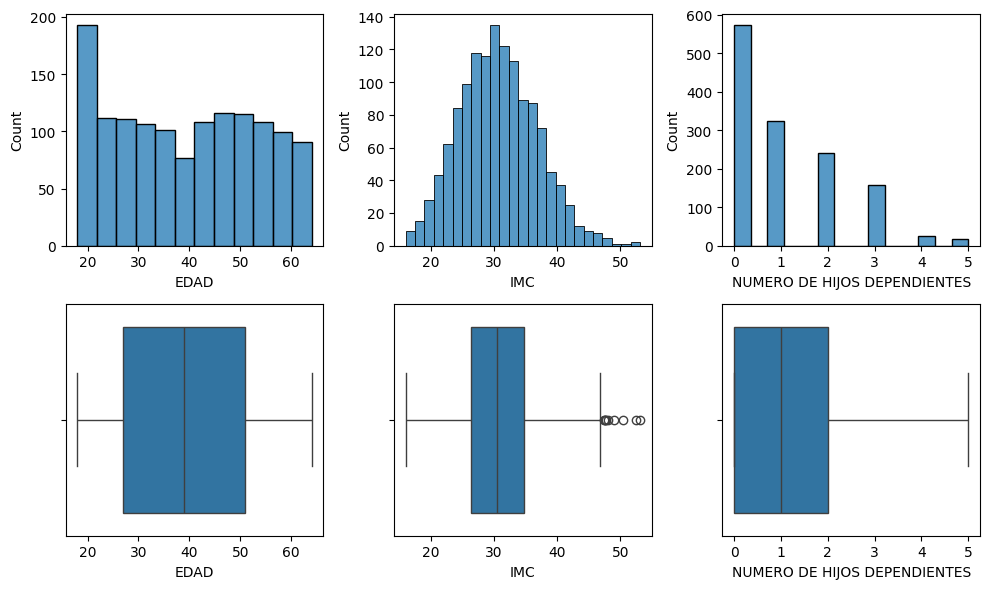

In [42]:
print("ANALISIS UNIVARIANTE DE NUMERICAS")
fig, axis = plt.subplots(2, 3, figsize = (10, 6))

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = "EDAD")
sns.boxplot(ax = axis[1, 0], data = df, x = "age").set(xlabel = "EDAD")

sns.histplot(ax = axis[0, 1], data = df, x = "bmi").set(xlabel = "IMC")
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi").set(xlabel= "IMC")

sns.histplot(ax = axis[0, 2], data = df, x = "children").set(xlabel = "NUMERO DE HIJOS DEPENDIENTES")
sns.boxplot(ax = axis[1, 2], data = df, x = "children").set(xlabel="NUMERO DE HIJOS DEPENDIENTES")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

---------------ANALISIS MULTIVARIANTE------------------
ANALISIS NUMERICO-NUMERICO


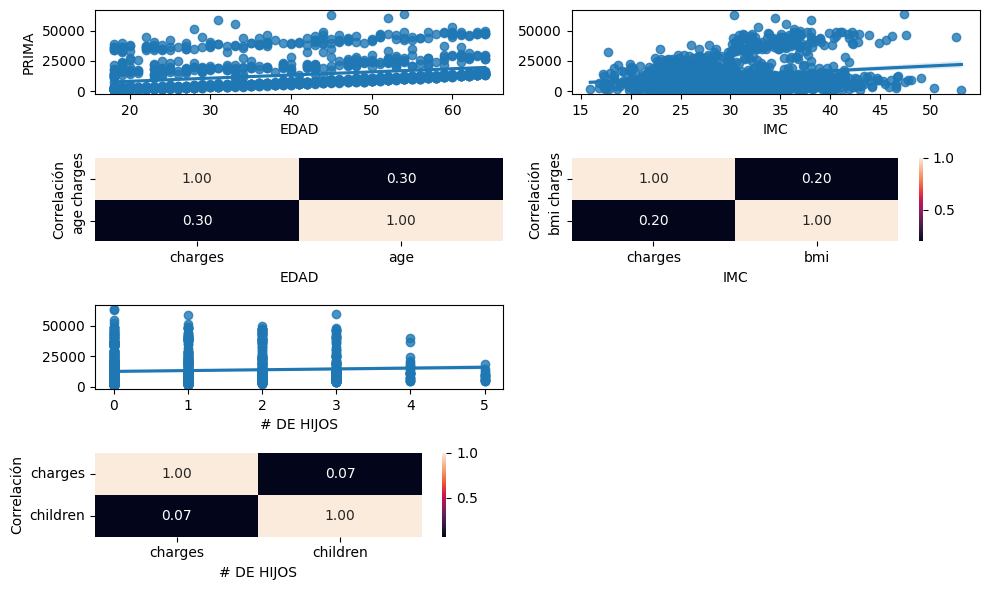

In [43]:
print("---------------ANALISIS MULTIVARIANTE------------------\nANALISIS NUMERICO-NUMERICO")
fig, axis = plt.subplots(4, 2, figsize=(10, 6))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax=axis[0, 0], data=df, x="age", y="charges")
axis[0, 0].set_xlabel("EDAD")
axis[0, 0].set_ylabel("PRIMA")

sns.heatmap(df[["charges", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
axis[1, 0].set_xlabel("EDAD")
axis[1, 0].set_ylabel("Correlación")

sns.regplot(ax=axis[0, 1], data=df, x="bmi", y="charges").set(ylabel=None)
axis[0, 1].set_xlabel("IMC")

sns.heatmap(df[["charges", "bmi"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])
axis[1, 1].set_xlabel("IMC")
axis[1, 1].set_ylabel("Correlación")

sns.regplot(ax=axis[2, 0], data=df, x="children", y="charges").set(ylabel=None)
axis[2, 0].set_xlabel("# DE HIJOS")

sns.heatmap(df[["charges", "children"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0])
axis[3, 0].set_xlabel("# DE HIJOS")
axis[3, 0].set_ylabel("Correlación")

fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [44]:
df["sex_fact"] = pd.factorize(df["sex"])[0]
df["smoker_fact"] = pd.factorize(df["smoker"])[0]
df["region_fact"] = pd.factorize(df["region"])[0]
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_fact,smoker_fact,region_fact
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


-----------------ANALISIS NUMERICO - CATEGORICO (ANALISIS COMPLETO)
CORRELACION DE TODAS LAS VARIABLES


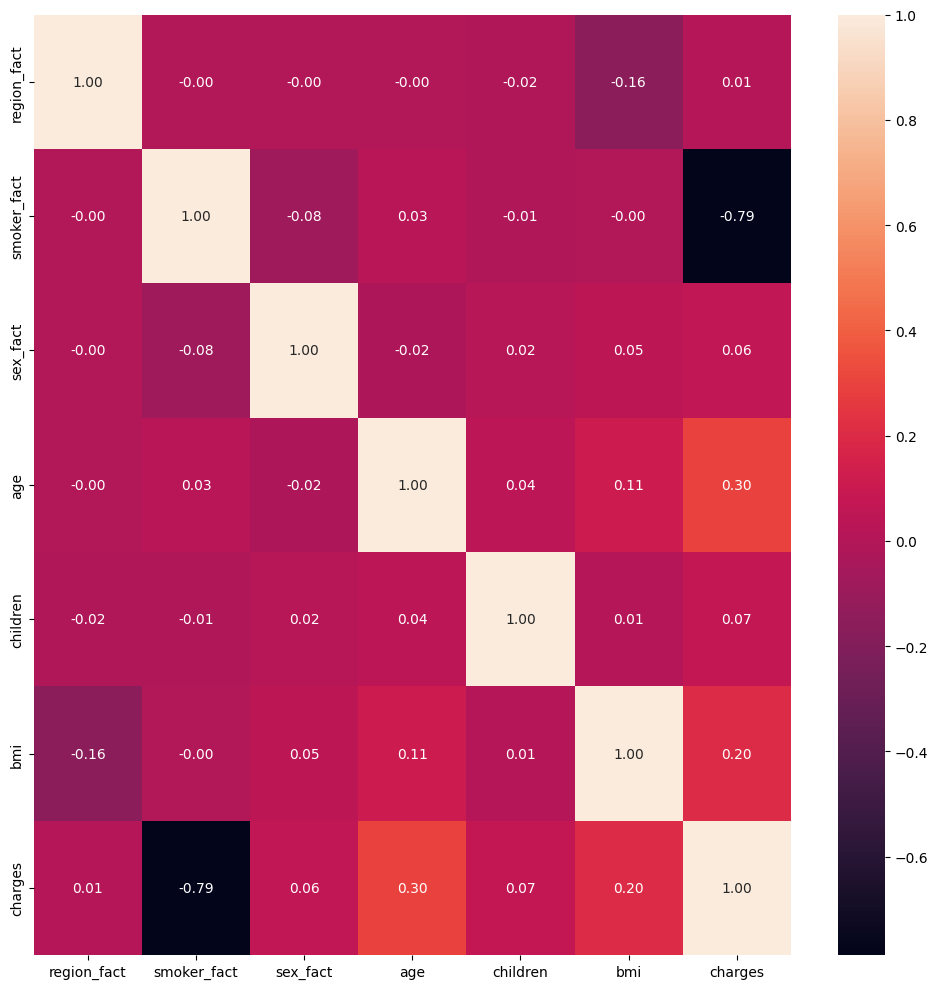

In [45]:
print("-----------------ANALISIS NUMERICO - CATEGORICO (ANALISIS COMPLETO)\nCORRELACION DE TODAS LAS VARIABLES")
fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(df[["region_fact", "smoker_fact", "sex_fact", "age", "children", "bmi", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [46]:
# ELIMINAMOS LAS COLUMNAS QUE SE CONSIDERAN NO RELACIONADAS CON LA NECESIDAD
#df.drop(["children", "sex", "region"], axis = 1, inplace = True)
#df.head()

EXISTE UNA FUERTA RELACION NEGATIVA ENTRE SER FUMADOR Y UNA RELACION POSITIVA EN LA EDAD .

----------------VALORES ATIPICOS-----------------



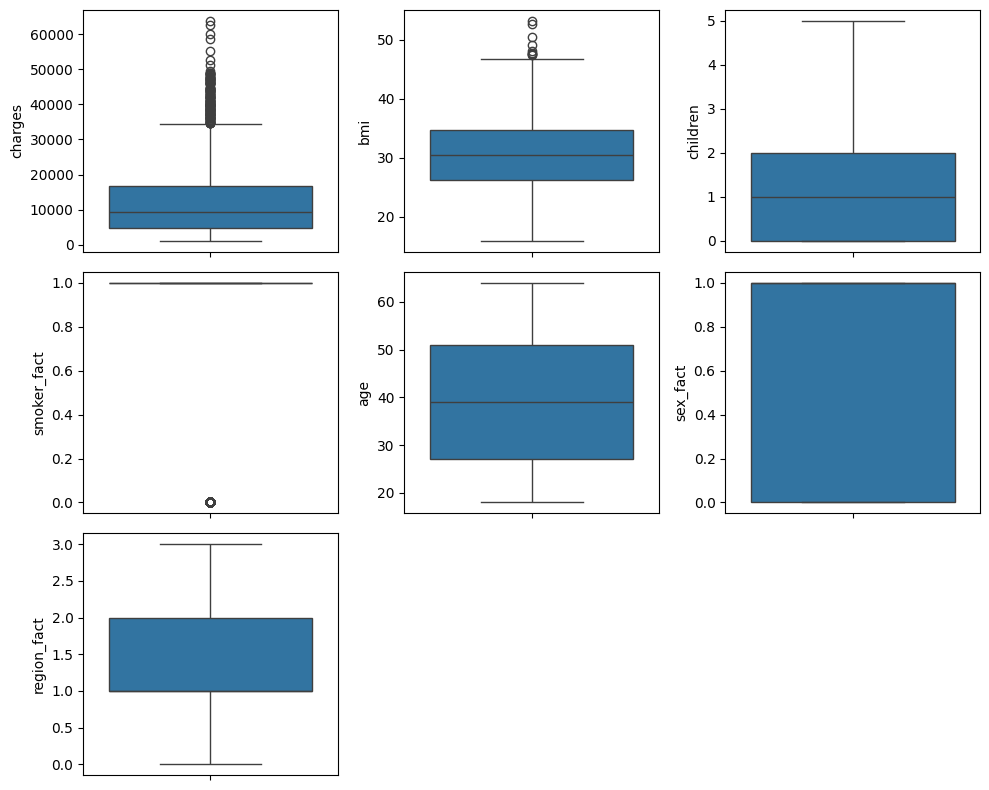

In [47]:
print("----------------VALORES ATIPICOS-----------------\n")
fig, axis = plt.subplots(3, 3, figsize = (10, 8))

sns.boxplot(ax = axis[0, 0], data = df, y = "charges")
sns.boxplot(ax = axis[0, 1], data = df, y = "bmi")
sns.boxplot(ax = axis[0, 2], data = df, y = "children")
sns.boxplot(ax = axis[1, 0], data = df, y = "smoker_fact")
sns.boxplot(ax = axis[1, 1], data = df, y = "age")
sns.boxplot(ax = axis[1, 2], data = df, y = "sex_fact")
sns.boxplot(ax = axis[2, 0], data = df, y = "region_fact")

fig.delaxes(axis[2, 1])
fig.delaxes(axis[2, 2])
plt.tight_layout()

plt.show()

In [48]:
""" ESTE CÓDIGO TE PERMITIRÁ NO SOLO IDENTIFICAR Y VISUALIZAR LOS OUTLIERS EN CADA 
 UNA DE LAS VARIABLES ESPECIFICADAS, SINO TAMBIÉN CONTAR CUÁNTOS DATOS ATÍPICOS 
 HAY EN CADA CASO. SI NECESITAS MÁS AJUSTES O TIENES MÁS PREGUNTAS, ¡ESTOY AQUÍ 
 PARA AYUDAR"""


# DEFINIMOS VARIABLES PARA REALIZAR LIMITES
variables = ["bmi", "smoker_fact", "charges"]

for var in variables:
    # Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites inferior y superior
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    print(f"ATRIBUTO: {var}")
    print(f"LOS LIMITES SUPERIORES E INFERIORES PARA LA BUSQUEDA DE OUTLIERS SON: {round(upper_limit, 2)} Y {round(lower_limit, 2)}, CON UN RANGO INTERCUARTÌLICO DE {round(IQR, 2)}\n")

    # Filtrar datos atípicos en la variable iterada según el upper_limit calculado
    var_atipica = df[df[var] >= upper_limit]
    num_outliers = var_atipica.shape[0]  # Contar el número de datos atípicos
    print(f"Datos atípicos en {var}:\n", var_atipica.head())
    print(f"NUMERO TOTAL DE DATOS ATIPICOS EN {var}: {num_outliers}\n")


ATRIBUTO: bmi
LOS LIMITES SUPERIORES E INFERIORES PARA LA BUSQUEDA DE OUTLIERS SON: 47.32 Y 13.67, CON UN RANGO INTERCUARTÌLICO DE 8.41

Datos atípicos en bmi:
      age     sex    bmi  children smoker     region      charges  sex_fact  \
116   58    male  49.06         0     no  southeast  11381.32540         1   
286   46  female  48.07         2     no  northeast   9432.92530         0   
401   47    male  47.52         1     no  southeast   8083.91980         1   
543   54  female  47.41         0    yes  southeast  63770.42801         0   
847   23    male  50.38         1     no  southeast   2438.05520         1   

     smoker_fact  region_fact  
116            1            1  
286            1            3  
401            1            1  
543            0            1  
847            1            1  
NUMERO TOTAL DE DATOS ATIPICOS EN bmi: 9

ATRIBUTO: smoker_fact
LOS LIMITES SUPERIORES E INFERIORES PARA LA BUSQUEDA DE OUTLIERS SON: 1.0 Y 1.0, CON UN RANGO INTERCUARTÌLICO DE 0

In [49]:
# ELIMINAMOS LAS COLUMNAS FACTORIZADAS
df.drop(["sex_fact", "smoker_fact", "region_fact"], axis = 1, inplace = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
print("------------------DIVISION EN TRAIN Y TEST DE LOS DATOS--------------------------\n")
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

------------------DIVISION EN TRAIN Y TEST DE LOS DATOS--------------------------



,age,sex,bmi,children,smoker,region
1114,23,male,24.510,0,no,northeast
968,21,male,25.745,2,no,northeast
599,52,female,37.525,2,no,northwest
170,63,male,41.470,0,no,southeast
275,47,female,26.600,2,no,northeast


In [51]:
y_train.head()

1114     2396.09590
968      3279.86855
599     33471.97189
170     13405.39030
275      9715.84100
Name: charges, dtype: float64

In [52]:
# DEFINO LAS VARIABLES CATEGORICAS Y NUMERICAS
variables_categoricas = ['smoker','sex','region']
variables_numericas = ['age', 'bmi', 'children']

In [53]:

X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

print("-------------------CODIFICACION DE VARIABLES CATEGORICAS-------------------\nUTILIZO LABEL ENCODING") 
# instancio el encoder para cada variable categórica 
label_encoders = {} 
for var in variables_categoricas: 
    le = LabelEncoder() 
    X_train_cat_le[var + '_le'] = le.fit_transform(X_train[var]) 
    X_test_cat_le[var + '_le'] = le.transform(X_test[var]) 
    label_encoders[var] = le 
# Eliminar las columnas categóricas originales después de la codificación 
X_train_cat_le = X_train_cat_le.drop(columns=variables_categoricas) 
X_test_cat_le = X_test_cat_le.drop(columns=variables_categoricas) 
X_train_cat_le.head()

-------------------CODIFICACION DE VARIABLES CATEGORICAS-------------------
UTILIZO LABEL ENCODING


,age,bmi,children,smoker_le,sex_le,region_le
1114,23,24.510,0,0,1,0
968,21,25.745,2,0,1,0
599,52,37.525,2,0,0,1
170,63,41.470,0,0,1,2
275,47,26.600,2,0,0,0


In [54]:
print("--------------------ESCALADO DE VARIABLES NUMERICAS\nUTILIZO STANDARSCALER") 
# Instancio el escalador 
scaler = StandardScaler() 
# Entreno el escalador con los datos de entrenamiento 
scaler.fit(X_train[variables_numericas]) 

# Aplico el escalador en ambos 
X_train_num_scal = scaler.transform(X_train[variables_numericas]) 
X_train_num_scal = pd.DataFrame(X_train_num_scal, index=X_train.index, columns=[var + '_scaled' for var in variables_numericas]) 

X_test_num_scal = scaler.transform(X_test[variables_numericas]) 
X_test_num_scal = pd.DataFrame(X_test_num_scal, index=X_test.index, columns=[var + '_scaled' for var in variables_numericas]) 

X_train_num_scal.head()

--------------------ESCALADO DE VARIABLES NUMERICAS
UTILIZO STANDARSCALER


,age_scaled,bmi_scaled,children_scaled
1114,-1.157680,-0.996928,-0.907908
968,-1.300619,-0.792762,0.766904
599,0.914926,1.154664,0.766904
170,1.701087,1.806837,-0.907908
275,0.557580,-0.651417,0.766904


In [55]:
# Unificar el dataset preprocesado 
X_train_final = pd.concat([X_train_num_scal, X_train_cat_le], axis=1) 
X_test_final = pd.concat([X_test_num_scal, X_test_cat_le], axis=1) 

X_train_final = X_train_final.drop(columns=variables_numericas) 
X_test_final = X_test_final.drop(columns=variables_numericas)
X_train_final.head()

,age_scaled,bmi_scaled,children_scaled,smoker_le,sex_le,region_le
1114,-1.157680,-0.996928,-0.907908,0,1,0
968,-1.300619,-0.792762,0.766904,0,1,0
599,0.914926,1.154664,0.766904,0,0,1
170,1.701087,1.806837,-0.907908,0,1,2
275,0.557580,-0.651417,0.766904,0,0,0


In [56]:
print("----------------REALIZAMOS LA SELECCION DE LAS MEJORES 6 VARIABLES------------------") 
# Con un valor de k = 6
selection_model = SelectKBest(score_func=f_classif, k=6) 
selection_model.fit(X_train_final, y_train) 

ix = selection_model.get_support() 
X_train_sel = pd.DataFrame(selection_model.transform(X_train_final), columns=X_train_final.columns.values[ix]) 
X_test_sel = pd.DataFrame(selection_model.transform(X_test_final), columns=X_test_final.columns.values[ix]) 

X_train_sel.head()


----------------REALIZAMOS LA SELECCION DE LAS MEJORES 6 VARIABLES------------------


/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,age_scaled,bmi_scaled,children_scaled,smoker_le,sex_le,region_le
0,-1.157680,-0.996928,-0.907908,0.0,1.0,0.0
1,-1.300619,-0.792762,0.766904,0.0,1.0,0.0
2,0.914926,1.154664,0.766904,0.0,0.0,1.0
3,1.701087,1.806837,-0.907908,0.0,1.0,2.0
4,0.557580,-0.651417,0.766904,0.0,0.0,0.0


In [57]:
print("-------------OBTENEMOS LAS CARACTERISTICAS SELECCIONADAS-------------------")
# Obtener las características seleccionadas
selected_features = X_train_final.columns[selection_model.get_support()]

print("Características seleccionadas:", selected_features)

-------------OBTENEMOS LAS CARACTERISTICAS SELECCIONADAS-------------------
Características seleccionadas: Index(['age_scaled', 'bmi_scaled', 'children_scaled', 'smoker_le', 'sex_le',
       'region_le'],
      dtype='object')


In [58]:
X_train_final.head()

,age_scaled,bmi_scaled,children_scaled,smoker_le,sex_le,region_le
1114,-1.157680,-0.996928,-0.907908,0,1,0
968,-1.300619,-0.792762,0.766904,0,1,0
599,0.914926,1.154664,0.766904,0,0,1
170,1.701087,1.806837,-0.907908,0,1,2
275,0.557580,-0.651417,0.766904,0,0,0


In [60]:
X_test_final.head()

,age_scaled,bmi_scaled,children_scaled,smoker_le,sex_le,region_le
900,0.700518,-1.326734,-0.907908,0,1,0
1064,-0.728865,-0.816733,2.441716,0,0,3
1256,0.843457,0.966203,1.604310,0,0,1
298,-0.585927,0.636397,1.604310,1,1,1
237,-0.585927,1.297663,0.766904,0,1,2


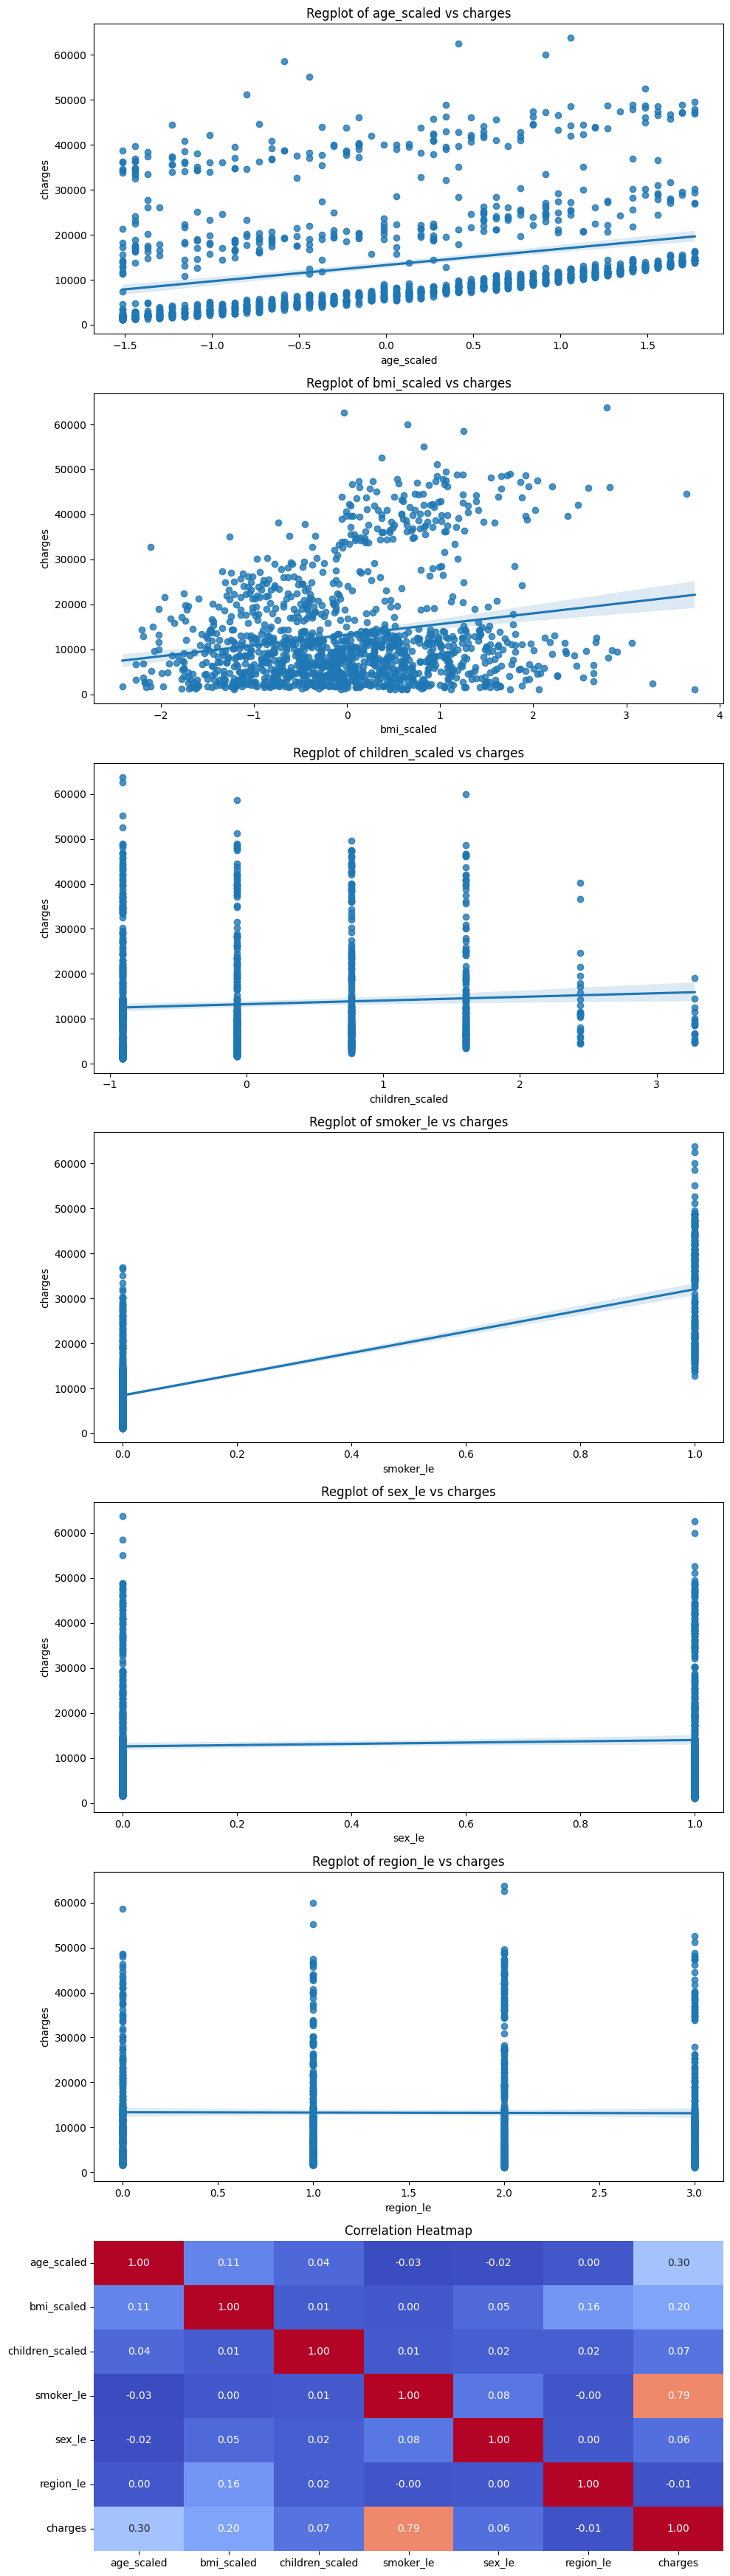

In [ ]:
# Concatenar los datos de entrenamiento y prueba 
total_data = pd.concat([X_train_final, X_test_final]) 
total_data['charges'] = pd.concat([y_train, y_test])

# Creación del gráfico combinado 
fig, axis = plt.subplots(len(selected_features) + 1, 1, figsize=(10, 5 * (len(selected_features) + 1))) 

# Crear gráficos regplot para cada variable predictora vs la variable objetivo 
for i, var in enumerate(selected_features): 
    sns.regplot(ax=axis[i], data=total_data, x=var, y='charges') 
    axis[i].set_title(f"Regplot of {var} vs {'charges'}") 
    axis[i].set_xlabel(var) 
    axis[i].set_ylabel('charges')

# Crear una matriz de correlación para el mapa de calor 
correlation_matrix = total_data[selected_features.tolist() + ['charges']].corr()
    
# Crear un mapa de calor 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=axis[-1], cbar=False) 
axis[-1].set_title('Correlation Heatmap') 
plt.tight_layout() 
plt.show()

In [ ]:
# instanciamos el modelo con valores por defecto
print("---------MODELO DE ENTRENAMIENTO CON REGRESION LINEAL------------")
model = LinearRegression()

# entrenamos
model.fit(X_train_final, y_train)

---------MODELO DE ENTRENAMIENTO CON REGRESION LINEAL------------


LinearRegression()

In [ ]:
print("-------BUSCO EL VALOR DEL INTERCEPTO Y LOS B1 DE CADA VARIABLES TOMADAS---------")
print(f"Intercepto (b0): {model.intercept_}")
print(f"Coeficientes (b1): {model.coef_}")

-------BUSCO EL VALOR DEL INTERCEPTO Y LOS B1 DE CADA VARIABLES TOMADAS---------
Intercepto (b0): 8829.748405552255
Coeficientes (b1): [ 3480.71806706  1890.9752842    637.82776712 23052.15275173
   -99.69539417  -237.62514748]


In [ ]:
print("-----PREDICCION DEL MODELO------")
y_pred = model.predict(X_test_final)
y_pred

-----PREDICCION DEL MODELO------


array([ 8.08045019e+03,  5.59287112e+03,  1.43782987e+04,  3.17318195e+04,
        9.15835694e+03,  1.33610143e+04,  3.02576553e+04,  1.30864736e+03,
        1.08494254e+04,  1.13755485e+04,  1.04822214e+04,  3.31558608e+04,
        3.09123841e+04,  1.71688443e+04,  1.06361393e+04,  9.37424715e+03,
        3.96524338e+03,  3.19229863e+04,  3.08468457e+03,  5.47544373e+03,
        3.76844305e+03,  3.01552667e+04,  1.50768984e+04,  3.02746510e+04,
        3.10830548e+04,  5.52001772e+03,  3.56655758e+04,  3.63713163e+04,
        1.12979802e+04,  1.40664742e+04,  6.37519963e+03,  1.29381095e+04,
        6.79284837e+02,  1.19476924e+04,  3.97832706e+04,  1.21517558e+04,
        4.57717842e+03,  4.01652351e+03,  3.11475453e+04,  9.22301501e+03,
        6.86852604e+03,  3.00358113e+04,  3.49732855e+04,  1.21709787e+04,
        7.46262777e+03,  3.27014535e+03,  6.02195905e+03,  8.81742438e+03,
        4.32171874e+03,  9.25718479e+03,  6.82679737e+03,  1.18887556e+04,
        3.11350727e+04,  

In [67]:
print(f"Intercepto (b0): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (b0): 8829.748405552255
Coeficientes (b1, b2): [ 3480.71806706  1890.9752842    637.82776712 23052.15275173
   -99.69539417  -237.62514748]


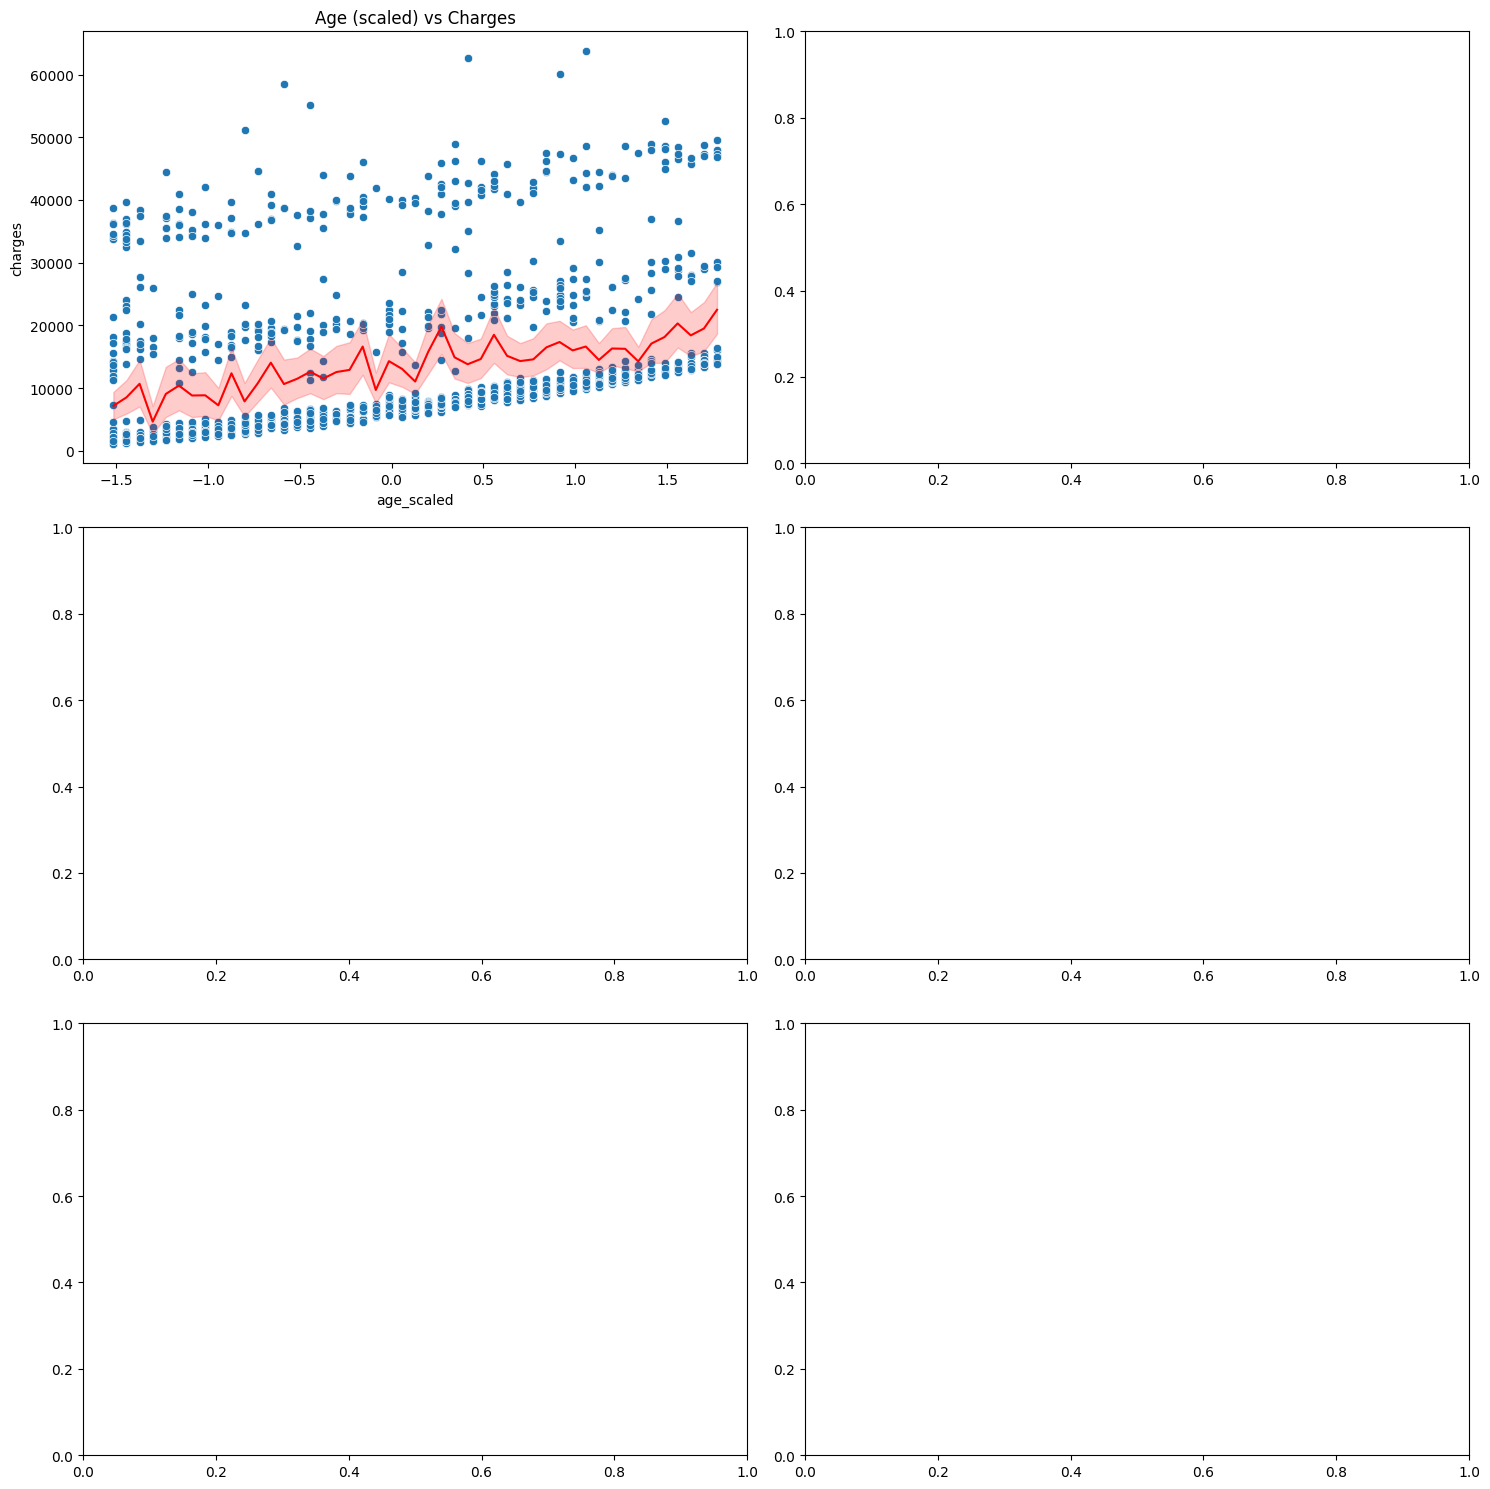

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [70]:
# Definir los parámetros de la regresión lineal múltiple 
intercept = 8829.748405552255 
coefficients = np.array([3480.71806706, 1890.9752842, 637.82776712, 23052.15275173, -99.69539417, -237.62514748])

# Crear la función de regresión lineal múltiple
regression_equation = lambda x: intercept + np.dot(x, coefficients)

# Creación del gráfico combinado 
fig, axes = plt.subplots(3, 2, figsize=(15, 15)) 
axes = axes.flatten() # Aplanar los ejes para iterar fácilmente

# Definimos las variables y sus títulos
variables = ["age_scaled", "bmi_scaled", "children_scaled", "smoker_le", "sex_le", "region_le"]
titles = ["Age (scaled) vs Charges", "BMI (scaled) vs Charges", "Children (scaled) vs Charges", "Smoker (encoded) vs Charges", "Sex (encoded) vs Charges", "Region (encoded) vs Charges"]

# Crear gráficos de dispersión y línea de regresión para cada variable predictora vs la variable objetivo
for i, var in enumerate(variables): 
    sns.scatterplot(ax=axes[i], data=total_data, x=var, y='charges') 
# La línea de regresión se calcula utilizando la regresión lineal múltiple 
    x_values = total_data[variables].values 
    regression_y = regression_equation(x_values) 
    sns.lineplot(ax=axes[i], x=total_data[var], y=regression_y, color="red") 
    axes[i].set_title(titles[i]) 
    axes[i].set_xlabel(var) 
    axes[i].set_ylabel('charges')

    plt.tight_layout() 
    plt.show()

In [71]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 35493102.61165051
Coeficiente de determinación: 0.8068466322629112
